In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
kd_col = pd.read_csv("F:\Packt\Project - jional\data\kdd99_columns.csv")
kdd = pd.read_csv('F:\Packt\Project - jional\data\kddcupdatacorrected.csv' , names = kd_col.Column1)

In [7]:
display(kdd.isna().sum())
kdd = kdd.dropna()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<AxesSubplot:>

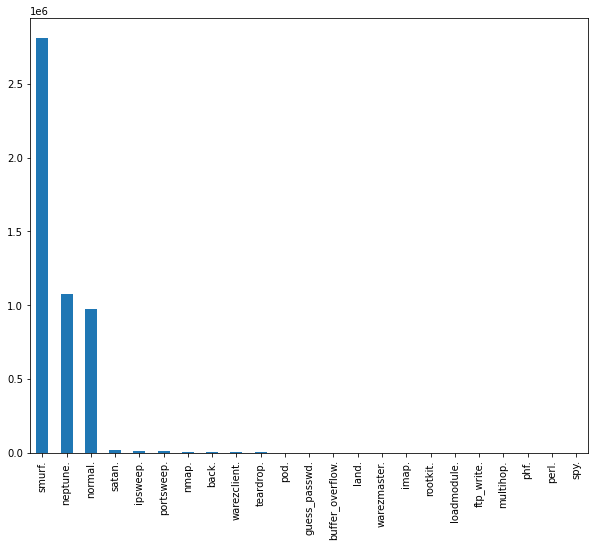

In [162]:
kdd.type.value_counts().plot(kind = 'bar', figsize = (10,8))

In [10]:
cat_var = kdd.select_dtypes('object').columns
num_var = kdd.select_dtypes(np.number).columns

<AxesSubplot:>

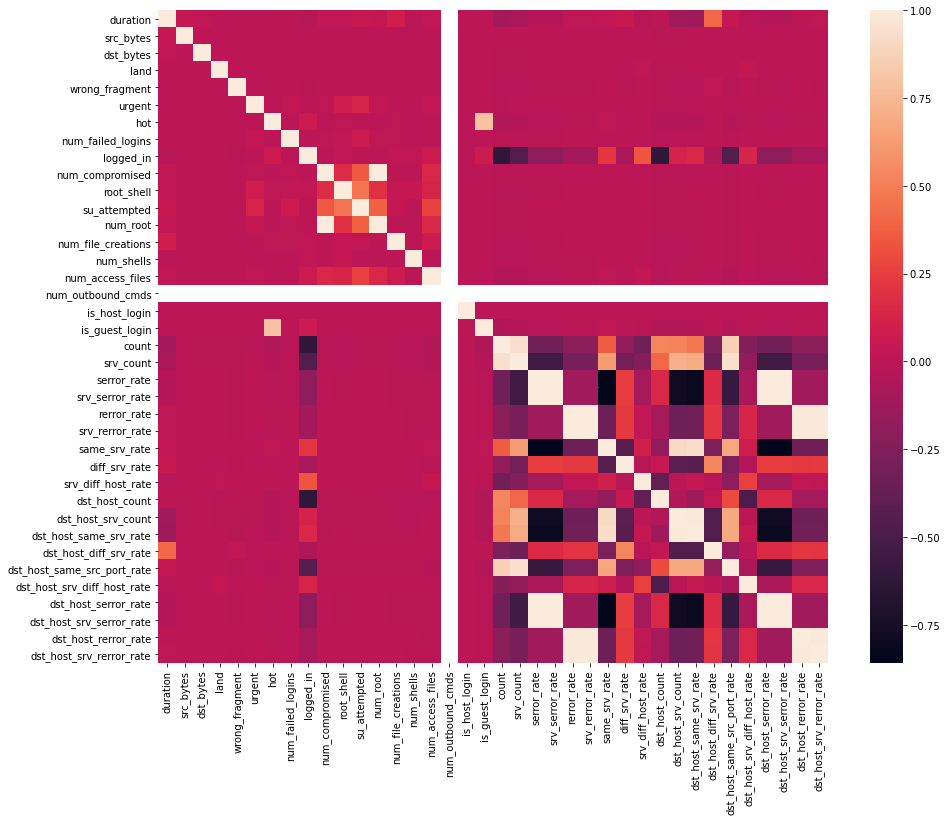

In [11]:
cor = kdd.select_dtypes(np.number).corr()
fg,ax = plt.subplots(figsize = (15,12) )
sns.heatmap(cor, ax = ax)

In [61]:
kdd['status'] = 'non-threat'
kdd['status'].loc[kdd.type != 'normal.'] = 'threat'

D:\programs\python\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:ylabel='status'>

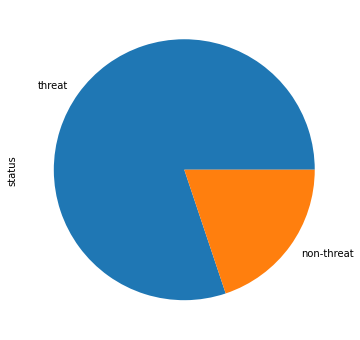

In [63]:
kdd.status.value_counts().plot(kind = 'pie', figsize = (8,6))

# under representation of non-threat status perhaps undersampling/oversampling techniques could help 

<AxesSubplot:>

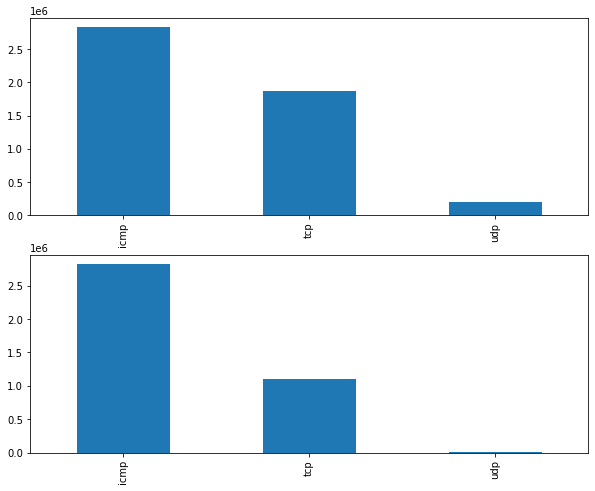

In [78]:
fig, axs = plt.subplots(2, 1, figsize = (10,8))
kdd.protocol_type.value_counts().plot(kind = 'bar', figsize = (10,8), ax = axs[0])
kdd.loc[kdd.status == 'threat'].protocol_type.value_counts().plot(kind = 'bar', figsize = (10,8), ax = axs[1])

<AxesSubplot:ylabel='status'>

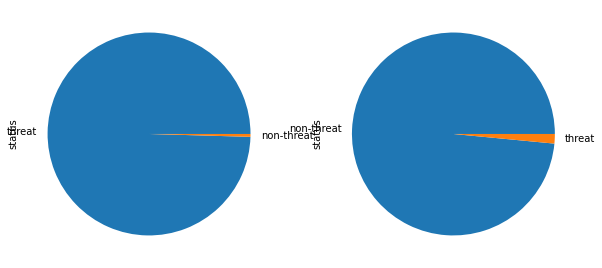

In [90]:
fig, axs = plt.subplots(1 ,2, figsize = (10,8))
kdd.loc[kdd.protocol_type == 'icmp'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[0])
kdd.loc[kdd.protocol_type == 'udp'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[1])
# most of protocol type icmp are threats 

<AxesSubplot:>

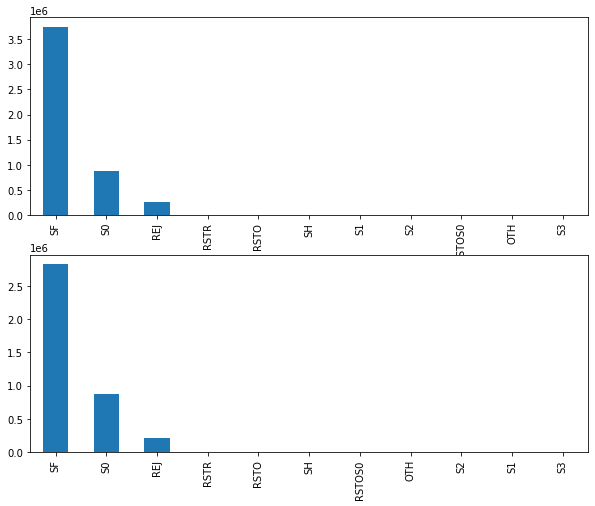

In [80]:
fig, axs = plt.subplots(2, 1, figsize = (10,8))
kdd.flag.value_counts().plot(kind = 'bar', figsize = (10,8), ax = axs[0])
kdd.loc[kdd.status == 'threat'].flag.value_counts().plot(kind = 'bar', figsize = (10,8), ax = axs[1])


<AxesSubplot:ylabel='status'>

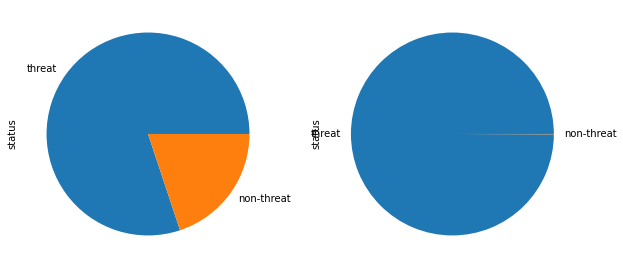

In [100]:
fig, axs = plt.subplots(1 ,2, figsize = (10,8))
kdd.loc[kdd.flag == 'REJ'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[0])
kdd.loc[kdd.flag == 'S0'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[1])



<AxesSubplot:>

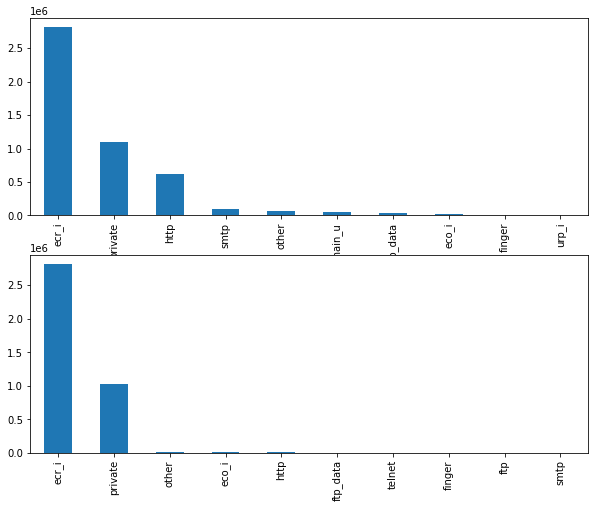

In [140]:
fig, axs = plt.subplots(2, 1, figsize = (10,8))
kdd.service.value_counts()[:10].plot(kind = 'bar', figsize = (10,8), ax = axs[0])
kdd.loc[kdd.status == 'threat'].service.value_counts()[:10].plot(kind = 'bar', figsize = (10,8), ax = axs[1])


<AxesSubplot:ylabel='status'>

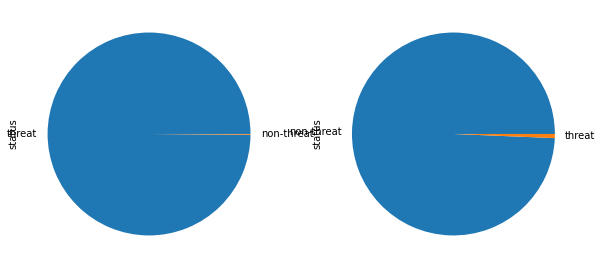

In [98]:
fig, axs = plt.subplots(1 ,2, figsize = (10,8))
kdd.loc[kdd.service == 'ecr_i'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[0])
kdd.loc[kdd.service == 'http'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[1])

#most of the http seem to be non threat

S1     99.248120
S2     95.031056
S3     92.000000
SF     24.495931
OTH    22.807018
Name: pert, dtype: float64

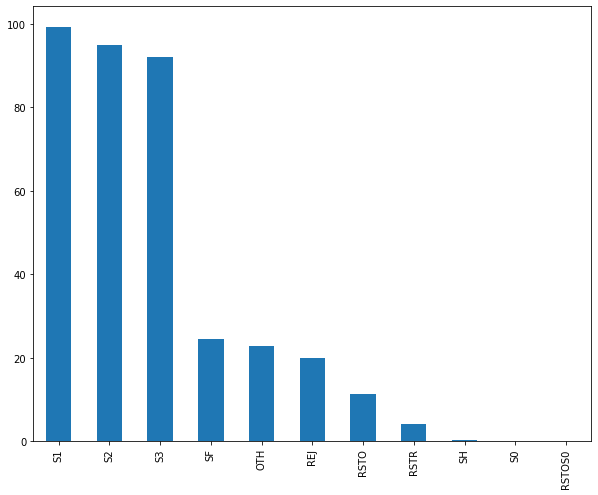

In [152]:
def plot_pert(feat):
    d1 = kdd.loc[kdd.type == 'normal.'][feat].value_counts()
    d2 = kdd[feat].value_counts()
    df = pd.concat([d1,d2], axis= 1)
    df['pert'] = df.iloc[:,0]/df.iloc[:,1]*100
    df = df.sort_values(by ='pert',ascending=False)
    df.pert.plot(kind = 'bar', figsize = (10,8))
    display(df.pert.head(5))
    return 

plot_pert('flag')


urh_i       100.000000
tftp_u      100.000000
ntp_u       100.000000
red_i       100.000000
domain_u     99.984424
Name: pert, dtype: float64

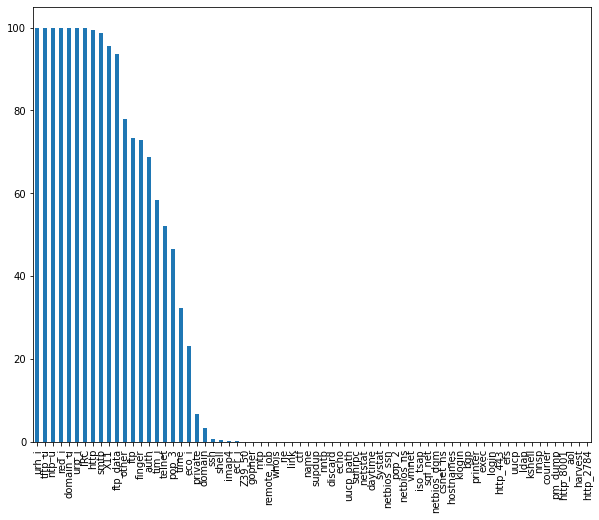

In [153]:
plot_pert('service')

udp     98.486783
tcp     41.092207
icmp     0.450425
Name: pert, dtype: float64

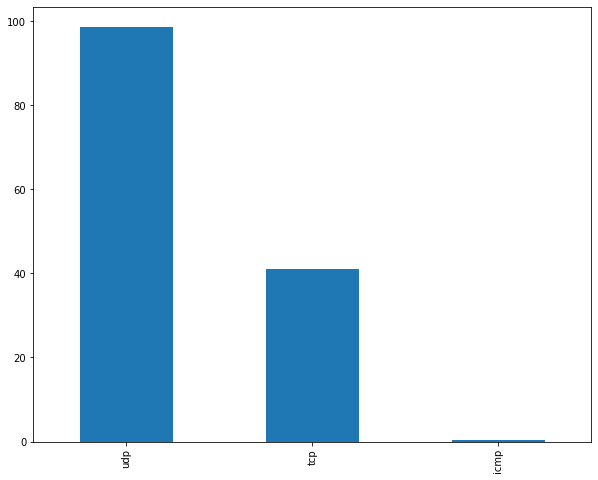

In [154]:
plot_pert('protocol_type')

1    99.519676
0     6.509352
Name: pert, dtype: float64

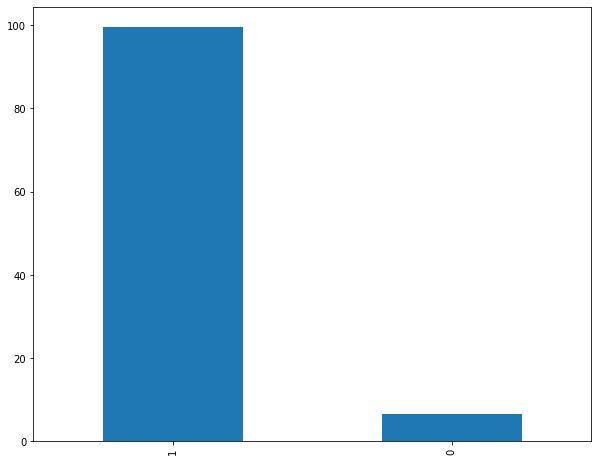

In [155]:
plot_pert('logged_in')

1    98.587571
2    40.000000
0    19.853322
Name: pert, dtype: float64

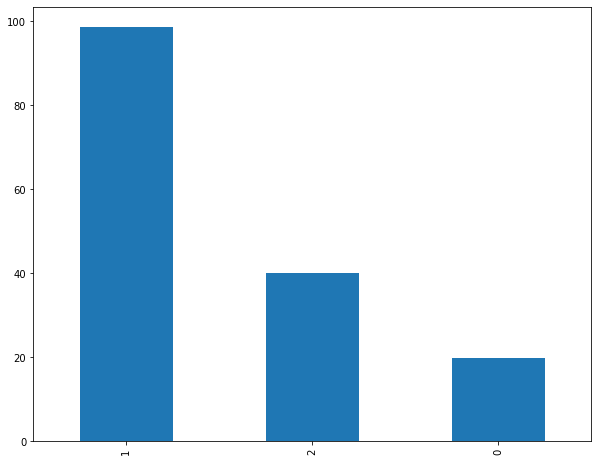

In [175]:
plot_pert('num_shells')


D:\programs\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_compromised'>

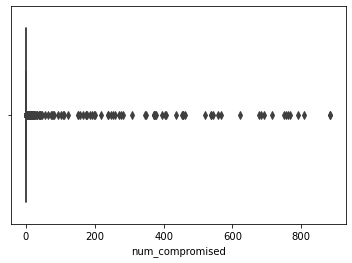

In [183]:
sns.boxplot(kdd['num_compromised'].loc[kdd['num_compromised']<1000])

D:\programs\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_file_creations'>

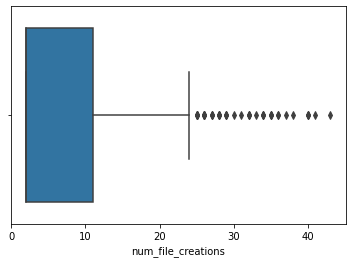

In [186]:
sns.boxplot(kdd['num_file_creations'].loc[kdd['num_file_creations']>1])
# kdd['num_file_creations'].value_counts()

D:\programs\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count'>

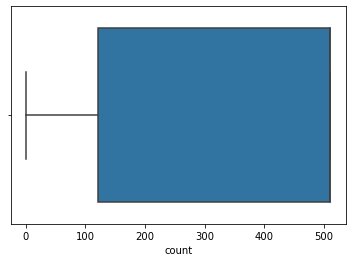

In [187]:
sns.boxplot(kdd['count'])

In [169]:
kdd['nsl'] = np.log1p(kdd['num_shells'])

<AxesSubplot:xlabel='num_compromised', ylabel='status'>

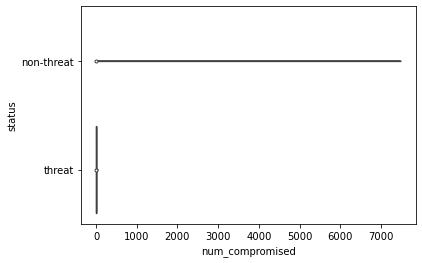

In [177]:
sns.violinplot(data=kdd, x="num_compromised", y="status")

<AxesSubplot:xlabel='count', ylabel='Density'>

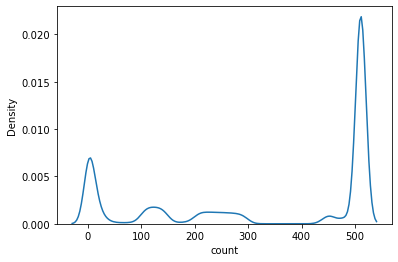

In [22]:
sns.kdeplot(x = kdd['count'])

In [5]:
Column_names=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','Target']
data_kdd=pd.read_csv('./kddcup.data.corrected.csv',names=Column_names)

In [6]:
data_kdd.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [9]:
labels=data_kdd['service'].unique()
values=[]
for i in labels:
    values.append(len(data_kdd.loc[(data_kdd['service']==i)]))

ar=sorted(list(zip(values,labels)),reverse=True)
for i in ar:
    print("{} : {}".format(i[1],i[0]),end=",")

ecr_i : 2811660,private : 1100831,http : 623091,smtp : 96554,other : 72653,domain_u : 57782,ftp_data : 40697,eco_i : 16338,finger : 6891,urp_i : 5378,ftp : 5214,telnet : 4277,ntp_u : 3833,auth : 3382,pop_3 : 1981,time : 1579,domain : 1113,Z39_50 : 1078,gopher : 1077,mtp : 1076,ssh : 1075,whois : 1073,remote_job : 1073,rje : 1070,link : 1069,imap4 : 1069,ctf : 1068,name : 1067,supdup : 1060,nntp : 1059,echo : 1059,discard : 1059,uucp_path : 1057,systat : 1056,sunrpc : 1056,netstat : 1056,daytime : 1056,pop_2 : 1055,netbios_ssn : 1055,netbios_ns : 1054,vmnet : 1053,sql_net : 1052,netbios_dgm : 1052,iso_tsap : 1052,shell : 1051,csnet_ns : 1051,klogin : 1050,hostnames : 1050,bgp : 1047,printer : 1045,login : 1045,exec : 1045,http_443 : 1044,efs : 1042,uucp : 1041,ldap : 1041,kshell : 1040,nnsp : 1038,courier : 1021,IRC : 521,urh_i : 148,X11 : 135,tim_i : 12,red_i : 9,pm_dump : 5,tftp_u : 3,http_8001 : 2,harvest : 2,aol : 2,http_2784 : 1,

In [10]:
df=data_kdd
ser_c=[]
for i in ar[11:]:
    ser_c.append(i[1])
df['service']=df['service'].replace(ser_c,'cc')

In [11]:
df['service'].unique()

array(['http', 'smtp', 'domain_u', 'cc', 'finger', 'eco_i', 'ftp',
       'ecr_i', 'other', 'urp_i', 'private', 'ftp_data'], dtype=object)

In [12]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Target
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


In [13]:
x_df=df.drop(['Target'],axis=1)

In [14]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

In [15]:
x_df["service_c"] = ord_enc.fit_transform(x_df[["service"]])
x_df["protocol_type_c"] = ord_enc.fit_transform(x_df[["protocol_type"]])
x_df["flag_c"] = ord_enc.fit_transform(x_df[["flag"]])

print(x_df['service_c'].unique())
print(x_df['protocol_type_c'].unique())
print(x_df['flag_c'].unique())

[ 7. 10.  1.  0.  4.  2.  5.  3.  8. 11.  9.  6.]
[1. 2. 0.]
[ 9.  7.  6.  8.  0.  1.  2.  5.  4.  3. 10.]


In [16]:
d_rel=x_df.drop(['service','protocol_type','flag'],axis=1)

In [17]:
d_rel.dtypes

duration                         int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate            

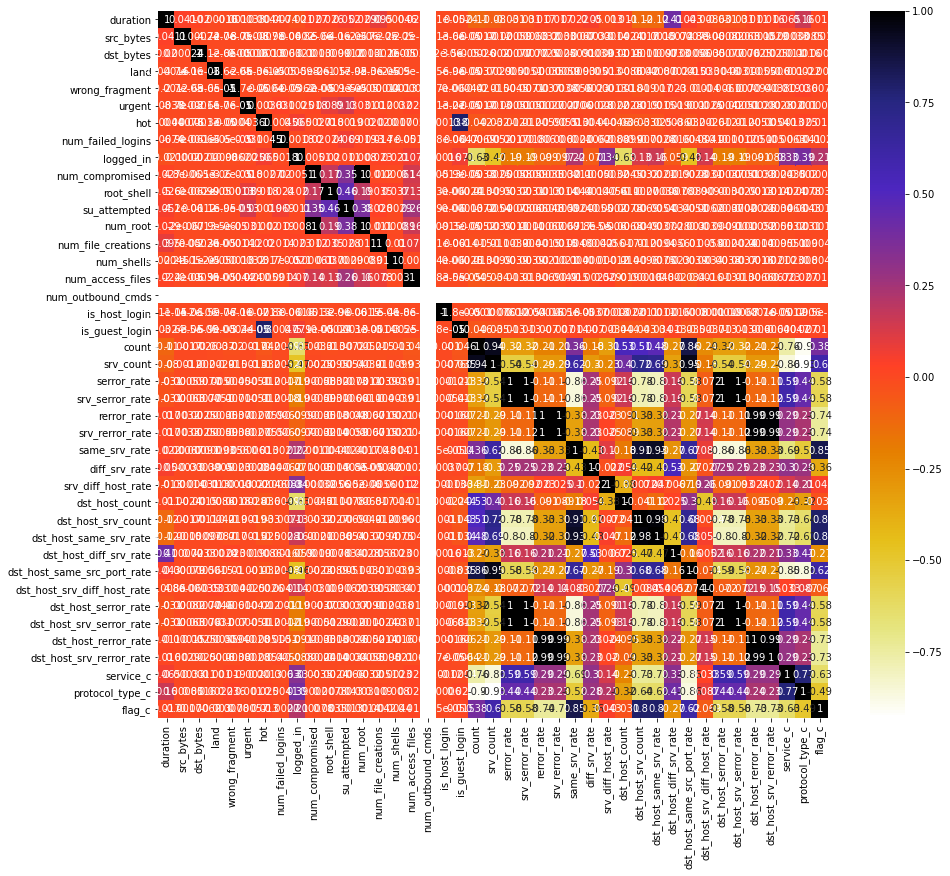

In [18]:
plt.figure(figsize=(15,13))
cor=d_rel.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [19]:
cor_col=set()
for i in range(len(cor.columns)):
    for j in range(i):
        if (cor.iloc[i,j])>0.8:
            temp=cor.columns[i]
            cor_col.add(temp)

In [20]:
print(cor_col)
print(len(cor_col))

{'dst_host_serror_rate', 'dst_host_srv_rerror_rate', 'flag_c', 'dst_host_srv_count', 'dst_host_rerror_rate', 'dst_host_same_src_port_rate', 'srv_count', 'is_guest_login', 'srv_serror_rate', 'srv_rerror_rate', 'num_root', 'dst_host_same_srv_rate', 'dst_host_srv_serror_rate'}
13
